# Importing libraries and installing packages

In [ ]:
import tensorflow as tf
import numpy as np
import gensim
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
import re
import pandas as pd
from keras import layers
import os
from collections import Counter
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
import string
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_validate
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import *
import keras

# Read the dataset from file, shuffling and deleting nan values

In [ ]:
dataset = pd.read_csv('popularity_dataset_final_all.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset = dataset.drop(np.where(np.isnan(dataset['Popularity']))[0]).reset_index(drop=True)
# to balance
#dataset = dataset.drop(dataset[dataset['Popularity'] == 0].sample(frac=.5).index).reset_index(drop=True)

In [ ]:
df['nome_squadra'] = ''

mappa[df['ID']] =  DF['nome']

# Removing urls and special characters from tweets, then converting to lowercase


In [ ]:
pattern = r'[' + string.punctuation.replace('#', '') + "“”—’" + ']'
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

for i, row in dataset.iterrows():
  dataset.at[i, 'Tweet'] = re.sub(r'http\S+', ' ', dataset.at[i, 'Tweet'])
  dataset.at[i, 'Tweet'] = re.sub(r'https\S+', ' ', dataset.at[i, 'Tweet'])
  #dataset.at[i, 'Tweet'] = re.sub(pattern, ' ', dataset.at[i, 'Tweet'])
  dataset.at[i, 'Tweet'] = re.sub('\n', ' ', dataset.at[i, 'Tweet'])
  dataset.at[i, 'Tweet'] = re.sub('[^A-Za-z0-9#]+', ' ', dataset.at[i, 'Tweet'])
  dataset.at[i, 'Tweet'] = re.sub(emoji_pattern, ' ', dataset.at[i, 'Tweet'])
  dataset.at[i, 'Tweet'] = dataset.at[i, 'Tweet'].lower()

# Tokenizing

In [ ]:
import nltk
#nltk.download('punkt')

tweets_tokenized = []

for i, row in dataset.iterrows():
  tweets_tokenized.append(row['Tweet'].split())

all_stopwords = gensim.parsing.preprocessing.STOPWORDS

chars = set()

for i in range(1114112):
    chars.add(chr(i))

all_stopwords = all_stopwords.union(chars)

# Creating vocabulary without stopwords (don't run for NN)

In [ ]:
tweets_tokenized_final = []

def has_numbers(inputString):
  return any(char.isdigit() for char in inputString)

for tweet in tweets_tokenized:
  aux = []
  for word in tweet:
    if not word in all_stopwords:
      aux.append(word)
  tweets_tokenized_final.append(aux)

# Stemming and creating new vocabulary

In [ ]:
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item, to_lowercase=False))
    return stemmed

stemmer = PorterStemmer()
stemmed = []

for tweet in tweets_tokenized:
    stemmed.append(stem_tokens(tweet, stemmer))

vocab = {}

for i, tweet in enumerate(stemmed):
  for word in tweet:
    if word in vocab:
      vocab[word] += 1
    else:
      vocab[word] = 1

vocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))

# ONLY FOR NEURAL NETWORK!!

In [ ]:
# only for NN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

aux_data = []
  
for tweet in tweets_tokenized:
  s = ""
  for word in tweet:
    #if not word in all_stopwords:
      s += word + " "
  aux_data.append(s)

train_data = aux_data[:(int)(len(tweets_tokenized) * 80/100)]
test_data = aux_data[(int)(len(tweets_tokenized) * 80/100):]

num_words = 50000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(train_data)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)

# Get max training sequence length
maxlen = np.max([len(x) for x in train_sequences])

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

# Output the results of our work
print("Word index:\n", word_index)
print("\nTraining sequences:\n", train_sequences)
print("\nPadded training sequences:\n", train_padded)
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

Word index:
 {'<UNK>': 1, 'i': 2, 'the': 3, 'to': 4, 'a': 5, 'and': 6, 'is': 7, 'of': 8, 'my': 9, 'in': 10, 'you': 11, 'it': 12, 'for': 13, 's': 14, 'that': 15, 'on': 16, 't': 17, 'me': 18, 'so': 19, 'this': 20, 'be': 21, 'with': 22, 'like': 23, 'm': 24, 'but': 25, 'just': 26, 'have': 27, 'not': 28, 'are': 29, 'all': 30, 'at': 31, 'if': 32, 'can': 33, 'was': 34, 'they': 35, 'what': 36, 'we': 37, 'up': 38, 'about': 39, 'do': 40, 'out': 41, 'get': 42, 'don': 43, 'one': 44, 'he': 45, 'when': 46, 'people': 47, 'time': 48, 'will': 49, 'how': 50, 'your': 51, 'as': 52, 'from': 53, 'or': 54, 'no': 55, 'now': 56, 'who': 57, 'good': 58, 'know': 59, 'love': 60, 'go': 61, 'an': 62, 'has': 63, 'want': 64, 'think': 65, 'need': 66, 'been': 67, 'why': 68, 'got': 69, 'more': 70, 'some': 71, 'them': 72, 'going': 73, 're': 74, '3': 75, '2': 76, 'there': 77, '1': 78, 'by': 79, 'am': 80, 'back': 81, 'really': 82, 'she': 83, 'day': 84, 'amp': 85, 'his': 86, 'today': 87, 'see': 88, 'their': 89, 'her': 90, 'w

In [ ]:
len(word_index)

28252

In [ ]:
# only for NN
y_train = np.array(dataset['Popularity'], dtype='float64')[:(int)(len(tweets_tokenized) * 80/100)]
y_test = np.array(dataset['Popularity'], dtype='float64')[(int)(len(tweets_tokenized) * 80/100):]

# Creating the dataset with the k most used ngrams

TF-IDF:

In [ ]:
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    min_df=2,
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None,
    ngram_range=(1,6),
    max_features=4000,
    dtype=np.float32)

features = tfidf.fit_transform(stemmed)
 
data = pd.DataFrame(
     features.todense(),
     columns = tfidf.get_feature_names_out(),
     dtype=np.float32
)

data['Popularity'] = dataset['Popularity']

In [ ]:
data

,#1,#2,#90dayfianc,#aewdynamit,#ama,#auspol,#bambam,#bambam bambam1a,#bb24,#bbnaija,...,youtub,yr,yt,yuh,yummi,zero,zombi,zone,zoom,Popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.778211
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.593402
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.379006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.578496
23347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
23348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198930
23349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.568510


In [ ]:
np.where(np.isnan(data_array[:, :-1]))[0]

array([], dtype=int64)

BAG OF WORDS:

In [ ]:
data = []

for j, tweet in enumerate(stemmed):
  if (j % 100 == 0): print(j)
  arr = np.zeros(len(vocab)+1, dtype='float32')
  for i, key in enumerate(vocab):
    arr[i] = 1 if key in tweet else 0
    
  arr[len(vocab)] = dataset.iloc[j]['Popularity']
  data.append(arr)

data_array = np.array(data)
del data

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

# Word embedding

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(stemmed, workers=16)

In [ ]:
len(vocab)

25291

In [ ]:
data = pd.DataFrame([model[w] for w in model.wv.vocab])
data['Popularity'] = dataset['Popularity']

/tmp/ipykernel_211662/964440029.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data = pd.DataFrame([model[w] for w in model.wv.vocab])


# Calculating PCA

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=25, svd_solver='full')
X_pca = pca.fit_transform(data.iloc[:, :-1])

In [ ]:
X_pca[0]

array([-0.01, -0.01, -0.  , -0.  , -0.02, -0.01, -0.  , -0.  , -0.01,
       -0.01, -0.  ,  0.  , -0.01, -0.01, -0.02, -0.02, -0.  , -0.01,
       -0.01, -0.02, -0.05, -0.01, -0.04,  0.04, -0.  ])

# Finding intrinsic dimension of the data (useless)

In [ ]:
_data = dat.Data(data_array[:, :-1])
id_twoNN, _, r = _data.compute_id_2NN()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dadapy/_utils/utils.py:150: UserWarning: there may be data with zero distance from each other; this may compromise the correct behavior of some routines
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dadapy/id_estimation.py:205: RuntimeWarning: divide by zero encountered in true_divide
  mus[:, j] = distances[:, 2] / distances[:, 1]
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dadapy/id_estimation.py:205: RuntimeWarning: invalid value encountered in true_divide
  mus[:, j] = distances[:, 2] / distances[:, 1]


ValueError: array must not contain infs or NaNs

In [ ]:
print(f'ID = {id_twoNN: .2f}; r = {r: .2f}')

# Calculating SVD

In [ ]:
k = 1000

svd = TruncatedSVD(n_components=k)
X_svd = svd.fit_transform(data_array[:, :-1])
data_new = pd.DataFrame(X_svd)
data_new['Popularity'] = data_array[:, -1]
data = data_new

In [ ]:
# Fit a TruncatedSVD model to the data
k = 4000
svd = TruncatedSVD(n_components=k)
svd.fit(data.iloc[:, :-1])

# Get the explained variance of the singular values
explained_variance = svd.explained_variance_

# Plot the explained variance as a function of the number of components
plt.plot(explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

ValueError: n_components(4000) must be <= n_features(100).

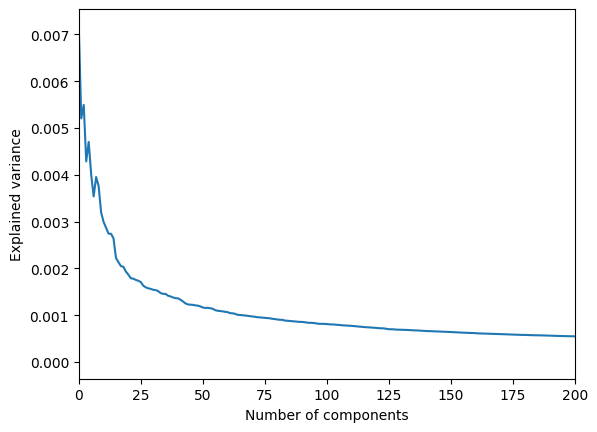

In [ ]:
plt.plot(explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.xlim([0, 200])
plt.show()

# Custom AUC for regression

In [ ]:
def regression_roc_auc_score(y_true, y_pred, num_rounds = 'exact'):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    num_pairs = 0
    num_same_sign = 0

    for i, j in _yield_pairs(y_true, num_rounds):
        diff_true = y_true[i] - y_true[j]
        diff_score = y_pred[i] - y_pred[j]
        if diff_true * diff_score > 0:
            num_same_sign += 1
        elif diff_score == 0:
            num_same_sign += .5
        num_pairs += 1

    return num_same_sign / num_pairs


def _yield_pairs(y_true, num_rounds):
    if num_rounds == 'exact':
        for i in range(len(y_true)):
            for j in np.where((y_true != y_true[i]) & (np.arange(len(y_true)) > i))[0]:
                yield i, j     
    else:
        for r in range(num_rounds):
            i = np.random.choice(range(len(y_true)))
            j = np.random.choice(np.where(y_true != y_true[i])[0])
            yield i, j

# Train a decision forest

Train test splitting:

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

K folds cross validation:

In [ ]:
cv = 5
max_features = (int)(np.ceil(1/3 * X_train.shape[1]))
regression_auc_scorer = make_scorer(regression_roc_auc_score)

scoring = {'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error',
           'RMSE': 'neg_root_mean_squared_error',
           'AUC': regression_auc_scorer}

rf = RandomForestRegressor(n_estimators=500,
                            max_features=max_features,
                            n_jobs=-1,
                            verbose=2)

scores = cross_validate(rf, X, y, cv=cv, scoring=scoring)

print("MAE: ", -np.mean(scores['test_MAE']))
print("MSE: ", -np.mean(scores['test_MSE']))
print("RMSE: ", -np.mean(scores['test_RMSE']))  
print("AUC: ", np.mean(scores['test_AUC']))  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed: 15.5min


KeyboardInterrupt: 

Train/test fixed 80/20 split validation:

In [ ]:
max_features = (int)(np.ceil(1/3 * X_train.shape[1]))
regression_auc_scorer = make_scorer(regression_roc_auc_score)

rf = RandomForestRegressor(n_estimators=500,
                            max_features=max_features,
                            n_jobs=-1,
                            verbose=2)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print("Random forest test MAE: ", MAE(y_test, y_test_pred))
print("Random forest test AUC: ", regression_roc_auc_score(y_test, y_test_pred))

# Plot the distribuition of the test labels and then the predicted one

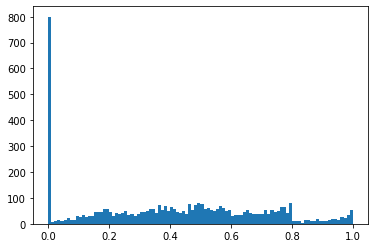

In [ ]:
plt.hist(y_test, bins=100)
plt.show()

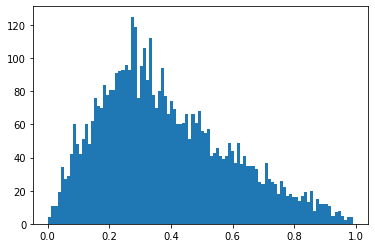

In [ ]:
plt.hist(y_test_pred, bins=100)
plt.show()

# Confusion matrix

In [ ]:
t = 0.4

x1 = len(np.where((y_test < t) & (y_test_pred < t))[0])
x2 = len(np.where((y_test < t) & (y_test_pred >= t))[0])
x3 = len(np.where((y_test >= t) & (y_test_pred < t))[0])
x4 = len(np.where((y_test >= t) & (y_test_pred >= t))[0])

print("\t\t y_test_pred")
print("\t\t 0\t1")
print()
print("y_test\t0\t",x1,"\t",x2)
print("\t1\t",x3,"\t",x4)

auc = x4/(2*(x4+x3)) + x1/(2*(x1+x2))
print("\nauc: ", auc)

		 y_test_pred
		 0	1

y_test	0	 2637 	 108
	1	 1404 	 206

auc:  0.5443030241319622


# Examine the tweets with the highest predicted popularity

In [ ]:
y_test_pred[np.where(y_test_pred >= 0.7899999)[0]]

array([0.80477161, 0.81041886, 0.79414112])

In [ ]:
y_test[np.where(y_test_pred >= 0.5)[0]]

17      0.323542
23      0.860506
51      0.313722
62      0.860671
69      0.094192
          ...   
4307    0.316216
4316    0.909009
4322    0.000000
4326    0.750818
4354    0.812568
Name: Popularity, Length: 271, dtype: float64

In [ ]:
dataset.iloc[17417+3341]['Tweet']

'i love twitter its like hot chocolate in your stomache as you lay chillen   #trending #motivation #podcast #climate #youtube #food #success  #business #newmusic #anime #sports #cooking #innovation #healthy #cannabis #hollywood #twitch #gamer #invest #brand #art #etsy'

In [ ]:
reg = svm.SVR(C=1.0, epsilon=0.2)
reg.fit(train_features, train_labels)

# Use the forest's predict method on the test data
train_pred = reg.predict(train_features)
test_pred = reg.predict(test_features)

print("SVM train MAE: ", MAE(train_labels, train_pred))
print("SVM test MAE: ", MAE(test_labels, test_pred))

SVM train MSE:  0.04162184701280141
SVM test MSE:  0.07519662224202583
SVM train MAE:  0.1804276500255825
SVM test MAE:  0.23396864948093252


# Learning with LSTM

In [ ]:
from keras import backend as K

voc_size = len(word_index) + 1
embedding_dim = 100
'''embedding_matrix = create_embedding_matrix(
     'glove.6B.50d.txt',
     tokenizer.word_index, embedding_dim)'''

model=keras.Sequential()
model.add(Embedding(input_dim=voc_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(LSTM(embedding_dim, return_sequences=False))
#model.add(LSTM(embedding_dim, return_sequences=False))
model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


mcp_save = keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_AUC', mode='max')
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-4),metrics=['MAE', 'AUC'])

model.fit(train_padded, y_train, epochs=40, batch_size=256, validation_data=(test_padded, y_test))


In [ ]:
y_test_pred = model.predict(test_padded)

137/137 [==============================] - 1s 4ms/step


# Transformer network

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

vocab_size = len(word_index) + 1
embed_dim = 200  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
#x = layers.Dropout(0.1)(x)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=1e-4), loss="mse", metrics=["MAE", "AUC"])
model.fit(
    train_padded, y_train, epochs=30, batch_size=1024, validation_data=(test_padded, y_test)
    )

In [ ]:
y_test_pred = model.predict(test_padded)

146/146 [==============================] - 1s 5ms/step
